# Challenge: Descriptive Statistics

In this challenge, you'll practice the statistical techniques you learned in the previous missions. These techniques are referred to collectively as **descriptive statistics** since they're used to describe and understand a dataset and not directly for prediction.<br>

The FiveThirtyEight team recently released a dataset containing the critics scores for a sample of movies that have substantive (at least 30) user and critic reviews from IMDB, Rotten Tomatoes, Metacritic, IMDB, and Fandango. Whenever a movie is released, movie review sites ask their approved network of critics and their site's user base to rate the movie. These scores are aggregated and the average score from both groups are posted on their site for each movie.<br>

Here are links to the page for **Star Trek Beyond** for each site:

* [Rotten Tomatoes](https://www.rottentomatoes.com/m/star_trek_beyond)
* [Fandango](http://www.fandango.com/startrekbeyond_188462/movieoverview)
* [Metacritic](http://www.metacritic.com/movie/star-trek-beyond)
* [IMDB](http://www.imdb.com/title/tt2660888/)

The dataset contains information on most movies from 2014 and 2015 and was used to help the team at FiveThirtyEight explore Fandango's suspiciously high ratings. You can read their analysis [here](http://fivethirtyeight.com/features/fandango-movies-ratings/).<br>

You'll be working with the file `fandango_score_comparison.csv`, which you can download from [their Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). Here are some of the columns in the dataset:

* `FILM` - film name.
* `RottenTomatoes` - Rotten Tomatoes critics average score.
* `RottenTomatoes_User` - Rotten Tomatoes user average score.
* `RT_norm` - Rotten Tomatoes critics average score (normalized to a 0 to 5 point scale).
* `RT_user_norm` - Rotten Tomatoes user average score (normalized to a 0 to 5 point scale).
* `Metacritic` - Metacritic critics average score.
* `Metacritic_user_nom` - Metacritic user average score (normalized to a 0 to 5 point scale).
* `Metacritic_norm` - Metacritic critics average score (normalized to a 0 to 5 point scale).
* `Fandango_Ratingvalue` - Fandango user average score (0 to 5 stars).
* `IMDB_norm` - IMDB user average score (normalized to a 0 to 5 point scale).

The full column list and descriptions are available at FiveThirtyEight's [Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). Let's focus on the normalized user scores for now and generate histograms to better understand each site's distributions.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
movie_reviews = pd.read_csv("data/fandango_score_comparison.csv")

In [3]:
movie_reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


**Drawing 4 histograms in 2x2 subplots**
* First plot (top most): Histogram of normalized Rotten Tomatoes scores by users.
* Second plot: Histogram of normalized Metacritic scores by users.
* Third plot: Histogram of Fandango scores by users.
* Fourth plot (bottom most): Histogram of IMDB scores by users.

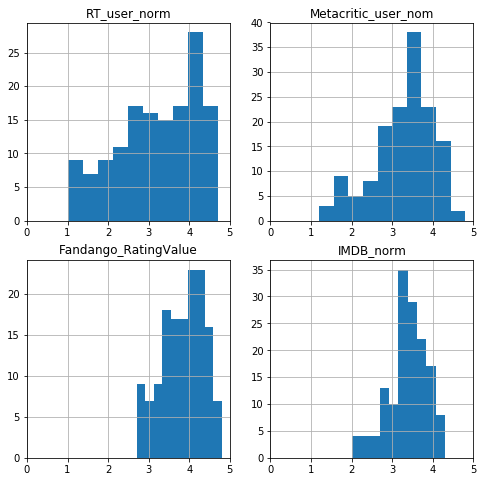

In [15]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.set_xlim(0, 5.0)
ax1.set_title('RT_user_norm')
ax2.set_xlim(0, 5.0)
ax2.set_title('Metacritic_user_nom')
ax3.set_xlim(0, 5.0)
ax3.set_title('Fandango_RatingValue')
ax4.set_xlim(0, 5.0)
ax4.set_title('IMDB_norm')

movie_reviews["RT_user_norm"].hist(ax=ax1)
movie_reviews["Metacritic_user_nom"].hist(ax=ax2)
movie_reviews["Fandango_Ratingvalue"].hist(ax=ax3)
movie_reviews["IMDB_norm"].hist(ax=ax4)

plt.show()

### Mean

In [20]:
def calc_mean(series):
    return series.mean()

user_review_cols = ['RT_user_norm',
                   'Metacritic_user_nom',
                   'Fandango_Ratingvalue',
                   'IMDB_norm']
user_reviews = movie_reviews[user_review_cols]

In [24]:
rt_mean = user_reviews.apply(calc_mean).RT_user_norm
mc_mean = user_reviews.apply(calc_mean).Metacritic_user_nom
fg_mean = user_reviews.apply(calc_mean).Fandango_Ratingvalue
id_mean = user_reviews.apply(calc_mean).IMDB_norm

print('rt_mean: {}\nmc_mean: {}\nfg_mean: {}\nid_mean: {}'\
     .format(rt_mean, mc_mean, fg_mean, id_mean))

rt_mean: 3.1938356164383563
mc_mean: 3.2595890410958903
fg_mean: 3.8452054794520545
id_mean: 3.3684931506849316


### Variance and standard deviation

In [29]:
def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

rt_var = user_reviews.apply(calc_variance).RT_user_norm
rt_stdev = user_reviews.apply(calc_variance).RT_user_norm**(1/2)

mc_var = user_reviews.apply(calc_variance).Metacritic_user_nom
mc_stdev = user_reviews.apply(calc_variance).Metacritic_user_nom**(1/2)

fg_var = user_reviews.apply(calc_variance).Fandango_Ratingvalue
fg_stdev = user_reviews.apply(calc_variance).Fandango_Ratingvalue**(1/2)

id_var = user_reviews.apply(calc_variance).IMDB_norm
id_stdev = user_reviews.apply(calc_variance).IMDB_norm**(1/2)


In [30]:
print('rt_var: {}\nmc_var: {}\nfg_var: {}\nid_var: {}'\
     .format(rt_var, mc_var, fg_var, id_var))

rt_var: 0.9955784387314692
mc_var: 0.5666546256333271
fg_var: 0.25110714955901664
id_var: 0.22821964721336085


In [31]:
print('rt_stdev: {}\nmc_stdev: {}\nfg_stdev: {}\nid_stdev: {}'\
     .format(rt_stdev, mc_stdev, fg_stdev, id_stdev))

rt_stdev: 0.9977867701726002
mc_stdev: 0.7527646548778224
fg_stdev: 0.501105926485625
id_stdev: 0.47772340032006055


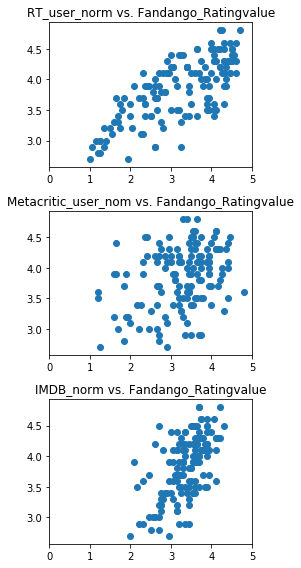

In [42]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_xlim(0, 5.0)
ax1.set_title('RT_user_norm vs. Fandango_Ratingvalue')
ax2.set_xlim(0, 5.0)
ax2.set_title('Metacritic_user_nom vs. Fandango_Ratingvalue')
ax3.set_xlim(0, 5.0)
ax3.set_title('IMDB_norm vs. Fandango_Ratingvalue')

ax1.scatter(user_reviews['RT_user_norm'],
           user_reviews['Fandango_Ratingvalue'])

ax2.scatter(user_reviews['Metacritic_user_nom'],
           user_reviews['Fandango_Ratingvalue'])

ax3.scatter(user_reviews['IMDB_norm'],
           user_reviews['Fandango_Ratingvalue'])

plt.tight_layout()
plt.show()

### Covariance
$cov(\mathbf{x},\mathbf{y})=
\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{n}$

In [43]:
def calc_covariance(series1, series2):
    
    return ((series1-series1.mean())*(series2-series2.mean()))\
            .mean()

    
rt_fg_covar = calc_covariance(\
                              user_reviews['RT_user_norm'],\
                              user_reviews['Fandango_Ratingvalue'])

mc_fg_covar = calc_covariance(\
                             user_reviews['Metacritic_user_nom'],\
                             user_reviews['Fandango_Ratingvalue'])

id_fg_covar = calc_covariance(\
                             user_reviews['IMDB_norm'],\
                             user_reviews['Fandango_Ratingvalue'])

print('rt_fg_cover: {}\nmc_fg_covar: {}\nid_fg_covar: {}'\
     .format(rt_fg_covar, mc_fg_covar, id_fg_covar))

rt_fg_cover: 0.36216222555826605
mc_fg_covar: 0.12710076937511725
id_fg_covar: 0.14371880277725652


### Correlation

$\frac{cov(\mathbf{x},\mathbf{y})}{\sigma_{x}\sigma_{y}}$

In [44]:
def calc_correlation(series1, series2):
    
    covar = calc_covariance(series1, series2)
    std_mult = calc_variance(series1)**(1/2)*\
                calc_variance(series2)**(1/2)
        
    return covar / std_mult

In [45]:
rt_fg_corr = calc_correlation(\
                             user_reviews['RT_user_norm'],
                             user_reviews['Fandango_Ratingvalue'])

mc_fg_corr = calc_correlation(\
                             user_reviews['Metacritic_user_nom'],\
                             user_reviews['Fandango_Ratingvalue'])

id_fg_corr = calc_correlation(\
                            user_reviews['IMDB_norm'],
                            user_reviews['Fandango_Ratingvalue'])

print('rt_fg_corr: {}\nmc_fg_corr: {}\nid_fg_corr: {}'\
     .format(rt_fg_corr, mc_fg_corr, id_fg_corr))

rt_fg_corr: 0.7243289942493147
mc_fg_corr: 0.33694531426494845
id_fg_corr: 0.6003541772626365


### Summary

As the scatter plots suggested, 
* Rotten Tomatoes and IMDB correlate the strongest with Fandango, with correlation values of 0.72 and 0.60 respectively. 
* Metacritic, on the other hand, only has a correlation value of 0.34 with Fandango. 
* While covariance and correlation values may seem complicated to compute and hard to reason with, their best use case is in comparing relationships like we did in this challenge.

In the next mission, we'll explore the basics of linear regression, which is a powerful machine learning technique.